## Final Assignment of the Course Python for Geospatial Analysis PhD Course @ AAU CPH, Spring 2020

Submitted by 
Nithin Babu


### Part 1
Function that plots the projected total and urban population from 2010
    to 2100 for a selected country as a line chart
    
    Input parameter: Country ID from https://en.wikipedia.org/wiki/ISO_3166-1_numeric
    
    Output: A line chart showing projected total and urban population from 2010
    to 2100

In [2]:
#importing the required packages
import rasterio #for raster analysis
import os
%matplotlib inline
import matplotlib.pyplot as plt #for plots
import numpy as np # for array operations
from matplotlib.colors import LogNorm #for the heatmap generation

In [3]:
import numpy as np
import seaborn as sns  # wrapper for matplotlib to make nice plots, in our case of the rasters   
from scipy import signal  # for the focal function
from skimage import graph # can do least cost
from matplotlib.colors import LogNorm

In [4]:
countries_tif = rasterio.open('countries.tif') # opening the country tif  file containing the country Id for each cell of the raster
countries_tif.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': -99.0,
 'width': 2880,
 'height': 1117,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.125, 0.0, -180.0,
        0.0, -0.125, 83.75)}

In [5]:
st_4=rasterio.open('ssp4_2010.tif')
st_4.meta

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': 2147483647.0,
 'width': 2880,
 'height': 1117,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.125, 0.0, -180.0,
        0.0, -0.125, 83.749999999915)}

From the above steps, we can verufy that both the tif files set are having same crs and dimensions.

### Projected_Population Function
The function which takes country id as the input parameter and plot the projected population of the specified country in each decade from 2010 to 2100.
The main parts of the function are
1) Read the tif files corresponding to the country ID
2) Read the given tif files corresponding to the projected urban and total population
3) Find the sum of the urban, total population of the raster cells corresponding to the input country
4) plot the projected population as a function of the respective decade year. 


In [6]:
def projected_population(country_id):
    countries_tif = rasterio.open('countries.tif')
    countries = countries_tif.read(1,masked=True) # reading th country tif file
    c = countries == country_id
    #Reading the projected urban and total population tif files 
    filenames_total=['ssp4_2010.tif', 'ssp4_2020.tif', 'ssp4_2030.tif', 'ssp4_2040.tif', 'ssp4_2050.tif', 'ssp4_2060.tif', 'ssp4_2070.tif', 'ssp4_2080.tif', 'ssp4_2090.tif', 'ssp4_2100.tif']
    filenames_urb = ['ssp4urb2010.tif', 'ssp4urb2020.tif', 'ssp4urb2030.tif', 'ssp4urb2040.tif', 'ssp4urb2050.tif', 'ssp4urb2060.tif', 'ssp4urb2070.tif', 'ssp4urb2080.tif', 'ssp4urb2090.tif', 'ssp4urb2100.tif']
    #Initialise the arrays to store the projected population values
    p_urban=np.array([0,0,0,0,0,0,0,0,0,0])
    p_total=np.array([0,0,0,0,0,0,0,0,0,0])
    #For loop to find the sum of the population values of the raster cells corresponding to the input country
    #The loop iterates through all the 10 input tif files
    for i in range(len(filenames_total)): #for loop for reading the urban and total tif files in the lists created
        ssp4urban_tif = rasterio.open(filenames_urb[i]) #opening the urban population tif files
        ssp4total_tif = rasterio.open(filenames_total[i]) # opening the total population 
        pop_urban = ssp4urban_tif.read(1, masked=True) #reading the urban population tif files, masked will mask the nodata values
        pop_total = ssp4total_tif.read(1, masked=True) #reading the total population tif files, masked will mask the nodata values
        p_c_urban=np.sum(pop_urban[c])# Sum of the urban population values of the  cells corresponding to the input country id 
        p_c_total=np.sum(pop_total[c]) # Sum of the total population values of the  cells corresponding to the input country id   
        p_urban[i] =  p_c_urban #Assigning the values as the array elements 
        p_total[i] =  p_c_total #Assigning the values as the array elements 
    #plotting the obtained points using matplotlib
    year = [2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
    plt.plot(year,p_urban , color='g')
    plt.plot(year, p_total, color='orange')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Projected total and urban population of country ID: {:d}'.format(country_id))
    plt.legend(['Urban', 'Total'])
    plt.grid()
    plt.show()

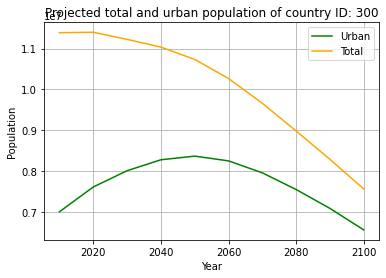

In [7]:
projected_population(300)

### Part 2
Generate a global raster that shows only the cells that are projected to lose population, and indicates how much the population in those cells is projected to decline between 2010 and 2100.
The main steps are
1) Read the tif file corresponding to the decade 2010 and 2100
2) for every cell check whether the projected population by 2100 is less than the population of 2010
   a) If yes store the raster value to the difference.
   b) If no assign the raster value to zero.
 3) Plot the raster

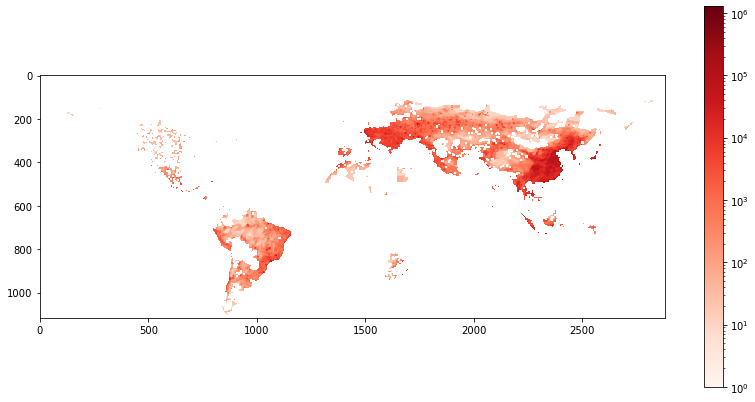

In [8]:
ssp4total2100_tif = rasterio.open('ssp4_2100.tif') #Open the total population tif file of the year 2100 
ssp4total2010_tif = rasterio.open('ssp4_2010.tif') #Open the total population tif file of the year 2010
pop_total2010 = ssp4total2010_tif.read(1,masked=True) #Read the total population tif file of the year 2100
pop_total2100 = ssp4total2100_tif.read(1,masked=True) #Read the total population tif file of the year 2010
p_change=pop_total2010-pop_total2100 #finding the change in population
p_change[p_change<0]=0               #Assigning the cells having non-declining population with zero value
#plotting the raster
plt.figure(figsize=(14, 7))
imgplot = plt.imshow(p_change,norm=LogNorm(), cmap='Reds')
plt.colorbar()


### Part2
Calculate the spatial weights matrix for the world based on border
neighborhood and use the weights to calculate Moran's I for child mortality.

Input files : World shape file from https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
child mortality file from  https://data.unicef.org/topic/child-survival/under-five-mortality/

In [9]:
#Importing the essential packages
import geopandas as gpd 
import os
import pandas as pd
import pysal as ps
#from pysal import lib
import libpysal 
from libpysal import weights
from pysal.explore import esda
from pysal.viz import mapclassify
import splot
from splot.esda import moran_scatterplot

In [10]:
#Reading the world shape file
fp = "ne_110m_admin_0_countries.shp" #file path
data = gpd.read_file(fp)
print ("The type of data is", type(data))


The type of data is <class 'geopandas.geodataframe.GeoDataFrame'>


In [11]:
#Reading the child mortality csv file 
fp2='under5mortality.csv' #file path
data2=pd.read_csv('under5mortality.csv')


In [12]:
#sample child mortality entries
print(data2.head()) 
data2.shape

   Unnamed: 0  ISO         Name  ChildMortality
0           1  AFG  Afghanistan            67.9
1           4  ALB      Albania             8.8
2           7  DZA      Algeria            24.0
3          10  AND      Andorra             3.3
4          13  AGO       Angola            81.1


(196, 4)

In [13]:
# Since the columns to be joined has different names, the 'ISO' column of child mortality is renamed with 'ISO_A3'
data2.rename(columns={'ISO':'ISO_A3'}, inplace=True)
print(data2.head()) 

   Unnamed: 0 ISO_A3         Name  ChildMortality
0           1    AFG  Afghanistan            67.9
1           4    ALB      Albania             8.8
2           7    DZA      Algeria            24.0
3          10    AND      Andorra             3.3
4          13    AGO       Angola            81.1


In [14]:
#LEFT JOINING THE TWO FILES
merge_data=pd.merge(data, data2, on='ISO_A3', how='left')
merge_data['ChildMortality'].fillna(0, inplace = True) 


In [15]:
#finding the Q weights for representing the spatial autocorrelation
w_queen = weights.Queen.from_dataframe(merge_data)
pd.DataFrame(w_queen.full()[0]).astype(int)

C:\Users\nbab\anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
 There are 21 islands with ids: 0, 19, 20, 22, 23, 45, 46, 47, 78, 89, 134, 135, 136, 137, 138, 140, 144, 147, 155, 159, 175.
  warnings.warn(message)


,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,0,0
173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0
175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#finding the nearest neighbour based  weight matrix for spatial autocorrelation
w_k1 = weights.KNN.from_dataframe(merge_data, k=1)

C:\Users\nbab\anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 46 disconnected components.
  warnings.warn(message)


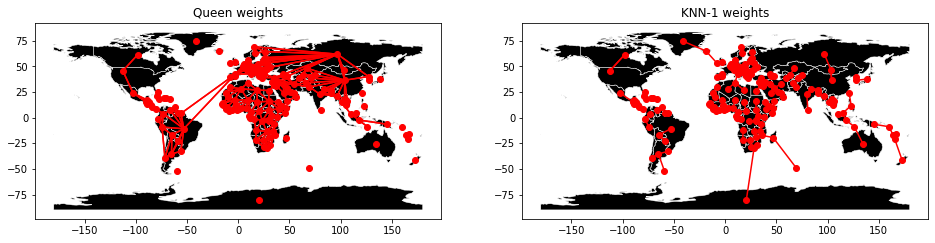

In [17]:
#Plotting the weights in a map
f, axs = plt.subplots(1, 2, figsize=(16, 8))

merge_data.plot(color='k', ax=axs[0], 
        edgecolor='w', linewidth=0.5)
w_queen.plot(merge_data, ax=axs[0], color='red')
axs[0].set_title('Queen weights')

merge_data.plot(color='k', ax=axs[1], 
        edgecolor='w', linewidth=0.5)
w_k1.plot(merge_data, ax=axs[1], color='red')
axs[1].set_title('KNN-1 weights')

plt.show()

In [18]:
#Finding the Moran's I for child mortality using the Q weights
moran = esda.Moran(merge_data['ChildMortality'].values, w_queen)
moran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neig

0.7095772721722277

In [19]:
#Finding the Moran's I for child mortality using the k1 weights
moran_k = esda.Moran(merge_data['ChildMortality'].values, w_k1)
moran_k.I

0.6448557076757723

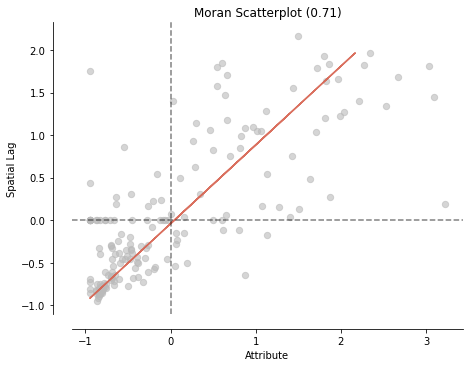

In [20]:
#Moran scatterplot 
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()